# 利用PCA使多个因子降维和去除共线性
 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

接下来，导入 IRIS花的数据

In [2]:
data = load_iris()
y = data.target
X = data.data
pca = PCA(n_components=2)          #将三维数据，降低为二维的数据
reduced_X = pca.fit_transform(X)   #transform命令，改变原有的数据

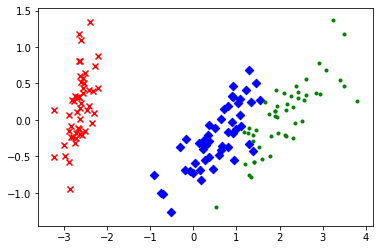

In [3]:
red_x, red_y = [], []
blue_x, blue_y = [], []
green_x, green_y = [], []

for i in range(len(reduced_X)):
    if y[i] == 0:
        red_x.append(reduced_X[i][0])
        red_y.append(reduced_X[i][1])
    elif y[i] == 1:
        blue_x.append(reduced_X[i][0])
        blue_y.append(reduced_X[i][1])
    else:
        green_x.append(reduced_X[i][0])
        green_y.append(reduced_X[i][1])

plt.scatter(red_x, red_y, c='r', marker='x')
plt.scatter(blue_x, blue_y, c='b', marker='D')
plt.scatter(green_x, green_y, c='g', marker='.')
plt.show()

# 下面是20只股票，10个因子的数据

In [12]:
# import numpy as np
# import pandas as pd
# from sklearn.decomposition import PCA
# import pickle
# data = pd.read_csv('./data/data.csv',header=0,index_col=0)
# # with open("./data/data.pkl", 'w') as f:
# #     pickle.dump(data.to_pickle(), f)
# data.to_pickle('./data/data.pkl')

In [20]:
## 10个因子，20只股票的数据
data = pd.read_pickle('./data/data.pkl')
data

,amt,close_adj,free_float_cap,high_adj,low_adj,open_adj,pe_ttm,s_val_pb_new,volume,vwap_adj
000001.SZ,708001.802,1101.920280,7.760000e+10,1104.080908,1085.715570,1092.197454,7.0569,0.7958,696364.55,1098.367599
000002.SZ,606994.703,3609.500400,1.400000e+11,3643.740720,3568.126680,3580.966800,9.0253,1.9949,240694.90,3597.862700
000004.SZ,3220.929,67.826491,8.470000e+08,68.436076,67.013711,67.826491,122.8454,11.0298,1932.18,67.744896
000005.SZ,117122.321,27.802800,2.480000e+09,29.934348,26.968716,26.968716,83.4508,2.3894,376948.36,28.795531
000006.SZ,38645.416,184.136956,4.640000e+09,184.479218,181.398860,182.083384,7.4896,1.2465,72307.16,182.925970
000008.SZ,95248.208,90.435282,6.530000e+09,90.435282,88.653306,89.321547,12.8967,1.6300,237609.26,89.290512
000009.SZ,53761.994,32.916633,7.800000e+09,32.916633,32.401160,32.769355,187.1584,1.8881,121099.81,32.691872
000011.SZ,32033.160,34.072514,1.420000e+09,34.247604,33.442190,33.582262,30.3630,2.0098,33109.00,33.880129
000012.SZ,25728.498,99.003723,7.070000e+09,99.241142,97.816628,98.528885,20.4627,1.3331,61914.45,98.659267
000014.SZ,27710.206,52.573347,1.300000e+09,52.627158,51.766182,52.142859,361.7140,2.6592,28548.15,52.231542


In [21]:
y = np.array([1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2])  #加入y值标签

### 先将股票数据（10维降到6维）

In [22]:
from sklearn.decomposition import PCA
myPCA = PCA(n_components=6)                                     # 降维到1维
myPCA.fit(data.values)
reduced_data = myPCA.fit_transform(data)                          # 获得PCA降维后的数据
explained_variance_ratio =  myPCA.explained_variance_ratio_     # 降维后信息可解释的比例(信息保存率)
# PCA降维结果展示
print("PCA:",myPCA.explained_variance_ratio_)                   # 降维后信息可解释的比例
print("redueced_data",reduced_data.T)    

('PCA:', array([1.00000000e+00, 2.04787036e-11, 8.62664605e-13, 3.08520394e-16,
       3.05976200e-17, 9.39324861e-19]))
('redueced_data', array([[ 6.37676000e+10,  1.26167600e+11, -1.29854000e+10,
        -1.13524000e+10, -9.19240000e+09, -7.30240000e+09,
        -6.03240000e+09, -1.24124000e+10, -6.76240000e+09,
        -1.25324000e+10, -1.00924000e+10, -1.26724000e+10,
        -1.31314000e+10, -9.44240000e+09, -1.27424000e+10,
        -1.21924000e+10, -1.23224000e+10, -8.14240000e+09,
        -9.03240000e+09, -1.15924000e+10],
       [ 4.85139083e+05, -2.67688693e+05, -8.57148043e+04,
         2.91155331e+05, -2.53445721e+04,  1.38085828e+05,
         9.52881488e+03, -4.74695845e+04, -5.23560634e+04,
        -5.29396259e+04, -2.62864079e+04,  3.95390564e+04,
        -7.37255964e+04, -1.80000422e+04, -3.58478808e+04,
        -3.36907415e+04, -5.45314354e+04, -6.90582558e+04,
        -5.80246724e+04, -6.27697376e+04],
       [-5.43125926e+04,  2.57535786e+04, -5.95547952e+03,
        

### 再将股票数据5维降到3维

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
# 读入分类数据X和类标签Y
X= reduced_data                                        # 类标签，共六组
# 对数据集进行降维
clf = LinearDiscriminantAnalysis(n_components=3)                        #  降低到1维
reduced_data = clf.fit_transform(X, y)
reduced_data.T

array([[-1.76496347, -2.08698624,  0.61206677, -2.54846032, -0.11466612,
        -1.42706978, -0.65567435,  0.53840886, -0.38620557,  0.66077193,
        -0.30432205,  1.83225186,  1.60831117,  0.01197548,  0.88423735,
         1.47504605,  0.4065475 , -0.06741416,  1.1880788 ,  0.13806627]])